# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [113]:
lat = []
temp = []
humidity = []
speed = []
cloud = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    
    response = requests.get(query_url + city).json()
 
    try:
        print(response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
    except (KeyError):
        print("Oops, that city doesn't exist.")
 
 


{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.14, 'pressure': 1032.53, 'humidity': 100, 'temp_min': 25.14, 'temp_max': 25.14, 'sea_level': 1032.57, 'grnd_level': 1032.53}, 'wind': {'speed': 6.41, 'deg': 63.5016}, 'clouds': {'all': 32}, 'dt': 1543749209, 'sys': {'message': 0.0039, 'country': 'PF', 'sunrise': 1543759539, 'sunset': 1543808022}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 15.09, 'pressure': 998.57, 'humidity': 88, 'temp_min': 15.09, 'temp_max': 15.09, 'sea_level': 1013.36, 'grnd_level': 998.57}, 'wind': {'speed': 1.21, 'deg': 309.502}, 'rain': {'3h': 0.305}, 'clouds': {'all': 8}, 'dt': 1543749209, 'sys': {'message': 0.0032, 'country': 'NZ', 'sunrise': 1543682928, 'sunset': 1543738

{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29, 'pressure': 1013, 'humidity': 30, 'temp_min': 29, 'temp_max': 29}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 9229, 'message': 0.003, 'country': 'IN', 'sunrise': 1543713188, 'sunset': 1543753791}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
{'coord': {'lon': -69.87, 'lat': -6.66}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 24.84, 'pressure': 1008.7, 'humidity': 93, 'temp_min': 24.84, 'temp_max': 24.84, 'sea_level': 1023.94, 'grnd_level': 1008.7}, 'wind': {'speed': 1.31, 'deg': 176.002}, 'clouds': {'all': 44}, 'dt': 1543749116, 'sys': {'message': 0.0037, 'country': 'BR', 'sunrise': 1543745674, 'sunset': 1543790624}, 'id': 3664321, 'name': 'Eirunepe', 'cod': 2

{'coord': {'lon': -70.76, 'lat': -28.58}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 14.89, 'pressure': 896.76, 'humidity': 84, 'temp_min': 14.89, 'temp_max': 14.89, 'sea_level': 1029.82, 'grnd_level': 896.76}, 'wind': {'speed': 1.06, 'deg': 22.0016}, 'clouds': {'all': 12}, 'dt': 1543749220, 'sys': {'message': 0.0027, 'country': 'CL', 'sunrise': 1543743445, 'sunset': 1543793291}, 'id': 3868633, 'name': 'Vallenar', 'cod': 200}
{'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1024, 'humidity': 34, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 1098, 'message': 0.0031, 'country': 'DZ', 'sunrise': 1543732553, 'sunset': 1543770326}, 'id': 2508813, 'name': 'Adrar', 'cod': 200}
{

{'coord': {'lon': -27.07, 'lat': 38.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20, 'pressure': 1014, 'humidity': 72, 'temp_min': 20, 'temp_max': 20}, 'visibility': 10000, 'wind': {'speed': 8.96, 'deg': 224.502}, 'clouds': {'all': 40}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 6895, 'message': 0.0032, 'country': 'PT', 'sunrise': 1543740522, 'sunset': 1543775210}, 'id': 3372760, 'name': 'Praia da Vitoria', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 167.69, 'lat': -46.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 14.01, 'pressure': 988.84, 'humidity': 95, 'temp_min': 14.01, 'temp_max': 14.01, 'sea_level': 1013.48, 'grnd_level': 988.84}, 'wind': {'speed': 0.76, 'deg': 331.502}, 'clouds': {'all': 12}, 'dt': 1543749225, 'sys': {'message': 0.0032, 'country'

{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.11, 'pressure': 985.76, 'humidity': 44, 'temp_min': 24.11, 'temp_max': 24.11, 'sea_level': 1025.07, 'grnd_level': 985.76}, 'wind': {'speed': 3.56, 'deg': 265.002}, 'clouds': {'all': 0}, 'dt': 1543749230, 'sys': {'message': 0.0035, 'country': 'ZA', 'sunrise': 1543721019, 'sunset': 1543772510}, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
{'coord': {'lon': 141.45, 'lat': -31.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23, 'pressure': 1011, 'humidity': 48, 'temp_min': 23, 'temp_max': 23}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 9491, 'message': 0.0034, 'country': 'AU', 'sunrise': 1543692051, 'sunset': 1543742799}, 'id': 2173911, 'name': 'Broken Hill', 'cod': 2

{'coord': {'lon': 124.74, 'lat': 55.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -23.87, 'pressure': 944.99, 'humidity': 68, 'temp_min': -23.87, 'temp_max': -23.87, 'sea_level': 1030.87, 'grnd_level': 944.99}, 'wind': {'speed': 1.36, 'deg': 36.0016}, 'clouds': {'all': 88}, 'dt': 1543749236, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1543707868, 'sunset': 1543734968}, 'id': 2014718, 'name': 'Tynda', 'cod': 200}
{'coord': {'lon': 153.24, 'lat': -28.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27.33, 'pressure': 1000, 'humidity': 69, 'temp_min': 27, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 360}, 'clouds': {'all': 48}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 9537, 'message': 0.0035, 'country': 'AU', 'sunrise': 1543689636, 'sunset': 1543739551}, 'id': 2160063, 'name': 'Co

{'coord': {'lon': -39.05, 'lat': -14.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.09, 'pressure': 1021.1, 'humidity': 91, 'temp_min': 28.09, 'temp_max': 28.09, 'sea_level': 1024.18, 'grnd_level': 1021.1}, 'wind': {'speed': 3.86, 'deg': 348.002}, 'clouds': {'all': 24}, 'dt': 1543748693, 'sys': {'message': 0.0035, 'country': 'BR', 'sunrise': 1543737446, 'sunset': 1543784057}, 'id': 3461408, 'name': 'Ilheus', 'cod': 200}
{'coord': {'lon': 17.88, 'lat': -29.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 28.74, 'pressure': 922.86, 'humidity': 20, 'temp_min': 28.74, 'temp_max': 28.74, 'sea_level': 1024.06, 'grnd_level': 922.86}, 'wind': {'speed': 4.46, 'deg': 231.502}, 'clouds': {'all': 32}, 'dt': 1543749242, 'sys': {'message': 0.0041, 'country': 'ZA', 'sunrise': 1543722026, 'sunset': 1543772152}, 'id': 3361142, 'name

{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -7, 'pressure': 1024, 'humidity': 92, 'temp_min': -7, 'temp_max': -7}, 'visibility': 24140, 'wind': {'speed': 1, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 935, 'message': 0.0041, 'country': 'CA', 'sunrise': 1543761558, 'sunset': 1543788155}, 'id': 6165406, 'name': 'Thompson', 'cod': 200}
{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 29.64, 'pressure': 1023.78, 'humidity': 100, 'temp_min': 29.64, 'temp_max': 29.64, 'sea_level': 1023.86, 'grnd_level': 1023.78}, 'wind': {'speed': 2.46, 'deg': 190.502}, 'clouds': {'all': 0}, 'dt': 1543749247, 'sys': {'message': 0.0173, 'country': 'KI', 'sunrise': 1543688369, 'sunset': 1543731417}, 'id': 2110227, 'name': 'Butaritari', 'cod

{'coord': {'lon': 120.72, 'lat': 14.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1012, 'humidity': 65, 'temp_min': 28, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8160, 'message': 0.0031, 'country': 'PH', 'sunrise': 1543701980, 'sunset': 1543742803}, 'id': 1682474, 'name': 'Ternate', 'cod': 200}
{'coord': {'lon': -6.55, 'lat': 41.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.89, 'pressure': 961.85, 'humidity': 86, 'temp_min': 10.89, 'temp_max': 10.89, 'sea_level': 1036.99, 'grnd_level': 961.85}, 'wind': {'speed': 2.41, 'deg': 242.502}, 'clouds': {'all': 56}, 'dt': 1543749252, 'sys': {'message': 0.0033, 'country': 'PT', 'sunrise': 1543736054, 'sunset': 1543769825}, 'id': 2737599, 'name': 'Saldanha', 'cod':

{'coord': {'lon': 77.57, 'lat': 8.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.79, 'pressure': 1021.51, 'humidity': 97, 'temp_min': 28.79, 'temp_max': 28.79, 'sea_level': 1021.59, 'grnd_level': 1021.51}, 'wind': {'speed': 8.16, 'deg': 65.0016}, 'clouds': {'all': 0}, 'dt': 1543748792, 'sys': {'message': 0.0029, 'country': 'IN', 'sunrise': 1543711717, 'sunset': 1543753785}, 'id': 1268008, 'name': 'Kanniyakumari', 'cod': 200}
{'coord': {'lon': 177.51, 'lat': 64.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -16, 'pressure': 997, 'humidity': 84, 'temp_min': -16, 'temp_max': -16}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8872, 'message': 0.0031, 'country': 'RU', 'sunrise': 1543700320, 'sunset': 1543717171}, 'id': 2127202, 'name': 'Anadyr', 'cod': 20

{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 24.96, 'lat': 63.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -3.02, 'pressure': 1006.92, 'humidity': 82, 'temp_min': -3.02, 'temp_max': -3.02, 'sea_level': 1020.29, 'grnd_level': 1006.92}, 'wind': {'speed': 3.36, 'deg': 170.502}, 'clouds': {'all': 64}, 'dt': 1543749263, 'sys': {'message': 0.1058, 'country': 'FI', 'sunrise': 1543736330, 'sunset': 1543754407}, 'id': 644509, 'name': 'Nivala', 'cod': 200}
{'coord': {'lon': -82.53, 'lat': 33.19}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 18.79, 'pressure': 1009, 'humidity': 90, 'temp_min': 18, 'temp_max': 19.4}, 'visibility': 14484, 'w

{'coord': {'lon': -53.81, 'lat': -29.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 14.99, 'pressure': 992.73, 'humidity': 72, 'temp_min': 14.99, 'temp_max': 14.99, 'sea_level': 1031.15, 'grnd_level': 992.73}, 'wind': {'speed': 4.76, 'deg': 166.502}, 'clouds': {'all': 8}, 'dt': 1543749269, 'sys': {'message': 0.0033, 'country': 'BR', 'sunrise': 1543739229, 'sunset': 1543789370}, 'id': 3450083, 'name': 'Santa Maria', 'cod': 200}
{'coord': {'lon': -66.38, 'lat': 50.2}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -6, 'pressure': 1023, 'humidity': 79, 'temp_min': -6, 'temp_max': -6}, 'visibility': 24140, 'wind': {'speed': 2.6, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1543747860, 'sys': {'type': 1, 'id': 1013, 'message': 0.0031, 'country': 'CA', 'sunrise': 1543752304, 'sunset': 1543782297}, 'id': 6144312, 'name': 'Sept-Iles', 'cod': 2

{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -6.62, 'pressure': 1017.7, 'humidity': 100, 'temp_min': -6.62, 'temp_max': -6.62, 'sea_level': 1020.94, 'grnd_level': 1017.7}, 'wind': {'speed': 4.81, 'deg': 139.502}, 'clouds': {'all': 68}, 'dt': 1543749274, 'sys': {'message': 0.003, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}
{'coord': {'lon': 49.82, 'lat': 7.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.91, 'pressure': 1010.57, 'humidity': 75, 'temp_min': 28.91, 'temp_max': 28.91, 'sea_level': 1021.59, 'grnd_level': 1010.57}, 'wind': {'speed': 7.91, 'deg': 62.5016}, 'clouds': {'all': 0}, 'dt': 1543749275, 'sys': {'message': 0.0031, 'country': 'SO', 'sunrise': 15

{'coord': {'lon': 8.4, 'lat': 9.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.64, 'pressure': 933.56, 'humidity': 43, 'temp_min': 29.64, 'temp_max': 29.64, 'sea_level': 1021.51, 'grnd_level': 933.56}, 'wind': {'speed': 1.81, 'deg': 159.502}, 'clouds': {'all': 64}, 'dt': 1543749280, 'sys': {'message': 0.0081, 'country': 'NG', 'sunrise': 1543728481, 'sunset': 1543770232}, 'id': 2335713, 'name': 'Matagami', 'cod': 200}
{'coord': {'lon': 20.45, 'lat': -11.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 26.99, 'pressure': 890.76, 'humidity': 70, 'temp_min': 26.99, 'temp_max': 26.99, 'sea_level': 1019.4, 'grnd_level': 890.76}, 'wind': {'speed': 1.36, 'deg': 45.0016}, 'clouds': {'all': 24}, 'dt': 1543749280, 'sys': {'message': 0.0028, 'country': 'AO', 'sunrise': 1543723491, 'sunset': 1543769444}, 'id': 876233, 'name': 'Leua

{'coord': {'lon': 44.32, 'lat': 15.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.89, 'pressure': 786.52, 'humidity': 18, 'temp_min': 22.89, 'temp_max': 22.89, 'sea_level': 1020.21, 'grnd_level': 786.52}, 'wind': {'speed': 1.11, 'deg': 93.0016}, 'clouds': {'all': 0}, 'dt': 1543749285, 'sys': {'message': 0.0033, 'country': 'YE', 'sunrise': 1543720414, 'sunset': 1543761051}, 'id': 70979, 'name': 'Sayyan', 'cod': 200}
{'coord': {'lon': -87.97, 'lat': 15.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1009, 'humidity': 54, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 230}, 'clouds': {'all': 5}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 7097, 'message': 0.0034, 'country': 'HN', 'sunrise': 1543752168, 'sunset': 1543792813}, 'id': 3603330, 'name': 'Amapa', 'cod': 200}
{'cod': 

{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.44, 'pressure': 999.06, 'humidity': 17, 'temp_min': 24.44, 'temp_max': 24.44, 'sea_level': 1032.17, 'grnd_level': 999.06}, 'wind': {'speed': 7.26, 'deg': 59.5016}, 'clouds': {'all': 0}, 'dt': 1543749291, 'sys': {'message': 0.0028, 'country': 'ML', 'sunrise': 1543732823, 'sunset': 1543771829}, 'id': 2450173, 'name': 'Taoudenni', 'cod': 200}
{'coord': {'lon': 152.76, 'lat': -27.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.45, 'pressure': 1001, 'humidity': 69, 'temp_min': 27, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1543746600, 'sys': {'type': 1, 'id': 9481, 'message': 0.0035, 'country': 'AU', 'sunrise': 1543689925, 'sunset': 1543739492}, 'id': 2162644, 'name': 'Ipswich', 'cod': 200

{'coord': {'lon': 24.66, 'lat': 14.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.49, 'pressure': 896.27, 'humidity': 16, 'temp_min': 30.49, 'temp_max': 30.49, 'sea_level': 1020.94, 'grnd_level': 896.27}, 'wind': {'speed': 4.31, 'deg': 26.0016}, 'clouds': {'all': 0}, 'dt': 1543749296, 'sys': {'message': 0.0031, 'country': 'SD', 'sunrise': 1543725034, 'sunset': 1543765870}, 'id': 371745, 'name': 'Kutum', 'cod': 200}
{'coord': {'lon': -61.45, 'lat': 10.24}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1014, 'humidity': 94, 'temp_min': 24, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 2.66, 'deg': 71.0016}, 'clouds': {'all': 20}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8810, 'message': 0.0039, 'country': 'TT', 'sunrise': 1543745308, 'sunset': 1543786942}, 'id': 3573739, 'name': 'Esperance', 'cod': 20

{'coord': {'lon': 54.37, 'lat': 24.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.48, 'pressure': 1013, 'humidity': 54, 'temp_min': 27, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 7533, 'message': 0.0038, 'country': 'AE', 'sunrise': 1543719018, 'sunset': 1543757617}, 'id': 292968, 'name': 'Abu Dhabi', 'cod': 200}
{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1007, 'humidity': 78, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8337, 'message': 0.0044, 'country': 'BR', 'sunrise': 1543737171, 'sunset': 1543785297}, 'id': 3448903, 'name': 'Sao Joao da Barra', 'cod': 200}
{'co

{'coord': {'lon': -89.83, 'lat': 13.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.86, 'pressure': 988.6, 'humidity': 88, 'temp_min': 20.86, 'temp_max': 20.86, 'sea_level': 1024.55, 'grnd_level': 988.6}, 'wind': {'speed': 1.36, 'deg': 50.0016}, 'clouds': {'all': 0}, 'dt': 1543749308, 'sys': {'message': 0.0032, 'country': 'SV', 'sunrise': 1543752460, 'sunset': 1543793415}, 'id': 3587498, 'name': 'Acajutla', 'cod': 200}
{'coord': {'lon': -74.96, 'lat': 10.99}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1011, 'humidity': 100, 'temp_min': 24, 'temp_max': 24}, 'visibility': 5000, 'wind': {'speed': 1}, 'clouds': {'all': 75}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8584, 'message': 0.0032, 'country': 'CO', 'sunrise': 1543748626, 'sunset': 1543790110}, 'id': 3671497, 'name': 'Puerto Colombia', 'cod': 200}
{'coord': {'lo

{'coord': {'lon': 27.85, 'lat': 71.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 1.66, 'pressure': 993.14, 'humidity': 97, 'temp_min': 1.66, 'temp_max': 1.66, 'sea_level': 1011.98, 'grnd_level': 993.14}, 'wind': {'speed': 7.36, 'deg': 202.502}, 'clouds': {'all': 8}, 'dt': 1543749315, 'sys': {'message': 0.0981, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
{'coord': {'lon': 73.75, 'lat': 18.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.54, 'pressure': 948.64, 'humidity': 42, 'temp_min': 25.54, 'temp_max': 25.54, 'sea_level': 1023.09, 'grnd_level': 948.64}, 'wind': {'speed': 1.41, 'deg': 88.5016}, 'clouds': {'all': 80}, 'dt': 1543749315, 'sys': {'message': 0.0029, 'country': 'IN', 'sunrise': 1543713724, 'sunset': 1543753609}, 'id': 1255134, 'name': 'Talegaon Dabhade', 'cod': 2

{'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.34, 'pressure': 871.31, 'humidity': 10, 'temp_min': 29.34, 'temp_max': 29.34, 'sea_level': 1019.36, 'grnd_level': 871.31}, 'wind': {'speed': 5.91, 'deg': 255.502}, 'clouds': {'all': 0}, 'dt': 1543749321, 'sys': {'message': 0.0032, 'country': 'ZA', 'sunrise': 1543720828, 'sunset': 1543771311}, 'id': 1014034, 'name': 'Carnarvon', 'cod': 200}
{'coord': {'lon': 82.18, 'lat': 29.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.34, 'pressure': 680.01, 'humidity': 78, 'temp_min': -1.34, 'temp_max': -1.34, 'sea_level': 1026.41, 'grnd_level': 680.01}, 'wind': {'speed': 0.66, 'deg': 237.002}, 'clouds': {'all': 0}, 'dt': 1543749322, 'sys': {'message': 0.0219, 'country': 'NP', 'sunrise': 1543712928, 'sunset': 1543750354}, 'id': 1283285, 'name': 'Jumla',

{'coord': {'lon': 130.64, 'lat': 42.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2.49, 'pressure': 1025.07, 'humidity': 100, 'temp_min': 2.49, 'temp_max': 2.49, 'sea_level': 1033.83, 'grnd_level': 1025.07}, 'wind': {'speed': 1.16, 'deg': 293.502}, 'clouds': {'all': 0}, 'dt': 1543749327, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1543703288, 'sunset': 1543736721}, 'id': 2039557, 'name': 'Khasan', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 6.8, 'lat': 58.09}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 8.36, 'pressure': 988.28, 'humidity': 100, 'temp_min': 8.36, 'temp_max': 8.36, 'sea_level': 1002.29, 'grnd_level': 988.28}, 'wind': {'speed': 2.66, 'deg': 169.502}, 'rain': {'3h': 5.1775}, 'clouds': {'all': 92}, 'dt': 1543749328, 'sys': {'message': 0.0116

{'coord': {'lon': 161.92, 'lat': -10.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 29.49, 'pressure': 1021.02, 'humidity': 98, 'temp_min': 29.49, 'temp_max': 29.49, 'sea_level': 1023.94, 'grnd_level': 1021.02}, 'wind': {'speed': 4.66, 'deg': 97.0016}, 'clouds': {'all': 0}, 'dt': 1543749332, 'sys': {'message': 0.0033, 'country': 'SB', 'sunrise': 1543689653, 'sunset': 1543735357}, 'id': 2178753, 'name': 'Kirakira', 'cod': 200}
{'coord': {'lon': 141.51, 'lat': 52.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -16.39, 'pressure': 1030.1, 'humidity': 68, 'temp_min': -16.39, 'temp_max': -16.39, 'sea_level': 1034.48, 'grnd_level': 1030.1}, 'wind': {'speed': 1.51, 'deg': 287.002}, 'clouds': {'all': 8}, 'dt': 1543749333, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1543702919, 'sunset': 1543731866}, 'id': 2123836, 'name': 'L

{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.94, 'pressure': 1025.16, 'humidity': 91, 'temp_min': 28.94, 'temp_max': 28.94, 'sea_level': 1025.56, 'grnd_level': 1025.16}, 'wind': {'speed': 1.41, 'deg': 298.002}, 'clouds': {'all': 12}, 'dt': 1543749338, 'sys': {'message': 0.0036, 'country': 'GW', 'sunrise': 1543734459, 'sunset': 1543775886}, 'id': 2374583, 'name': 'Bubaque', 'cod': 200}
{'coord': {'lon': -51.4, 'lat': -30.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18.16, 'pressure': 1014.29, 'humidity': 88, 'temp_min': 18.16, 'temp_max': 18.16, 'sea_level': 1028.56, 'grnd_level': 1014.29}, 'wind': {'speed': 7.81, 'deg': 220.502}, 'clouds': {'all': 8}, 'dt': 1543749338, 'sys': {'message': 0.0037, 'country': 'BR', 'sunrise': 1543738516, 'sunset': 1543788926}, 'id': 3446880, 'name': 'T

{'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.19, 'pressure': 1006.84, 'humidity': 88, 'temp_min': 26.19, 'temp_max': 26.19, 'sea_level': 1021.99, 'grnd_level': 1006.84}, 'wind': {'speed': 3.21, 'deg': 11.5016}, 'clouds': {'all': 64}, 'dt': 1543749344, 'sys': {'message': 0.0045, 'country': 'LK', 'sunrise': 1543710632, 'sunset': 1543752830}, 'id': 1242110, 'name': 'Kalmunai', 'cod': 200}
{'coord': {'lon': 10.89, 'lat': 45.88}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 0.28, 'pressure': 1019, 'humidity': 93, 'temp_min': -3, 'temp_max': 2}, 'visibility': 1500, 'wind': {'speed': 0.5}, 'clouds': {'all': 75}, 'dt': 1543747800, 'sys': {'type': 1, 'id': 6776, 'message': 0.0045, 'country': 'IT', 'sunrise': 1543732732, 'sunset': 1543764772}, 'id': 3172402, 'name': 'Nago', 'cod': 200}
{'coord': {'lon'

{'coord': {'lon': 122.42, 'lat': 17.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.69, 'pressure': 1001.65, 'humidity': 100, 'temp_min': 23.69, 'temp_max': 23.69, 'sea_level': 1028.2, 'grnd_level': 1001.65}, 'wind': {'speed': 3.51, 'deg': 19.0016}, 'clouds': {'all': 88}, 'dt': 1543749350, 'sys': {'message': 0.0041, 'country': 'PH', 'sunrise': 1543701862, 'sunset': 1543742104}, 'id': 1715015, 'name': 'Dicabisagan', 'cod': 200}
{'coord': {'lon': 120.58, 'lat': 18.47}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1011, 'humidity': 74, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8159, 'message': 0.0034, 'country': 'PH', 'sunrise': 1543702451, 'sunset': 1543742397}, 'id': 1715335, 'name': 'Davila', 

{'coord': {'lon': 50.26, 'lat': 44.51}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 4.39, 'pressure': 1034.07, 'humidity': 100, 'temp_min': 4.39, 'temp_max': 4.39, 'sea_level': 1037.76, 'grnd_level': 1034.07}, 'wind': {'speed': 6.01, 'deg': 119.502}, 'rain': {'3h': 0.815}, 'clouds': {'all': 92}, 'dt': 1543749355, 'sys': {'message': 0.0031, 'country': 'KZ', 'sunrise': 1543722993, 'sunset': 1543755608}, 'id': 609906, 'name': 'Fort-Shevchenko', 'cod': 200}
{'coord': {'lon': 143.24, 'lat': 64.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -43.09, 'pressure': 904.62, 'humidity': 0, 'temp_min': -43.09, 'temp_max': -43.09, 'sea_level': 1048.3, 'grnd_level': 904.62}, 'wind': {'speed': 0.86, 'deg': 252.002}, 'clouds': {'all': 36}, 'dt': 1543749355, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1543708421, 'sunset': 15437

{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 167.42, 'lat': -16.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25.94, 'pressure': 1016.4, 'humidity': 100, 'temp_min': 25.94, 'temp_max': 25.94, 'sea_level': 1026.33, 'grnd_level': 1016.4}, 'wind': {'speed': 3.61, 'deg': 117.002}, 'clouds': {'all': 8}, 'dt': 1543749361, 'sys': {'message': 0.0031, 'country': 'VU', 'sunrise': 1543687747, 'sunset': 1543734625}, 'id': 2136697, 'name': 'Lakatoro', 'cod': 200}
{'coord': {'lon': 21.02, 'lat': 56.52}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -2, 'pressure': 1009, 'humidity': 92, 'temp_min': -2, 'temp_max': -2}, 'visibility': 4000, 'wind': {'speed': 2.6, 'deg': 130}, 'clouds': {'all': 68}, 'dt': 1543747800, 'sys': {'type': 1, 'id': 1875, 'message': 0.0036, 'country': 'LV', 'sunrise': 1543733284, 

{'coord': {'lon': -46.24, 'lat': -22.19}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 20, 'pressure': 1014, 'humidity': 100, 'temp_min': 20, 'temp_max': 20}, 'visibility': 2000, 'wind': {'speed': 1.5, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1543744800, 'sys': {'type': 1, 'id': 8405, 'message': 0.0035, 'country': 'BR', 'sunrise': 1543738352, 'sunset': 1543786607}, 'id': 3469169, 'name': 'Cervo', 'cod': 200}
{'coord': {'lon': -70.49, 'lat': -25.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 13.89, 'pressure': 871.14, 'humidity': 87, 'temp_min': 13.89, 'temp_max': 13.89, 'sea_level': 1029.13, 'grnd_level': 871.14}, 'wind': {'speed': 1.31, 'deg': 60.0016}, 'clouds': {'all': 0}, 'dt': 1543749367, 'sys': {'message': 0.0036, 'country': 'CL', 'sunrise': 1543743785, 'sunset': 1543792819}, 'id': 3870243, 'name': 'Taltal', 'cod': 200}
{'coord'

{'coord': {'lon': 7.56, 'lat': 47.59}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 9.77, 'pressure': 1011, 'humidity': 100, 'temp_min': 8, 'temp_max': 12}, 'visibility': 4000, 'wind': {'speed': 1.5}, 'clouds': {'all': 75}, 'dt': 1543747800, 'sys': {'type': 1, 'id': 6585, 'message': 0.0483, 'country': 'CH', 'sunrise': 1543733908, 'sunset': 1543765194}, 'id': 2978742, 'name': 'Saint-Louis', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -15, 'pressure': 1008, 'humidity': 65, 'temp_min': -15, 'temp_max': -15}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 360}, 'clouds': {'all': 80}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8887, 'message': 0.0037, 'country': 'RU', 'sunrise': 1543699044, 'sunset': 

{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17, 'pressure': 1015, 'humidity': 77, 'temp_min': 17, 'temp_max': 17}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1543748400, 'sys': {'type': 1, 'id': 8408, 'message': 0.0035, 'country': 'BR', 'sunrise': 1543738492, 'sunset': 1543789287}, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
{'coord': {'lon': -71.56, 'lat': -16.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 4.14, 'pressure': 645.72, 'humidity': 21, 'temp_min': 4.14, 'temp_max': 4.14, 'sea_level': 1027.18, 'grnd_level': 645.72}, 'wind': {'speed': 1.76, 'deg': 27.0016}, 'clouds': {'all': 0}, 'dt': 1543749378, 'sys': {'message': 0.0033, 'country': 'PE', 'sunrise': 1543745080, 'sunset': 1543792033}, 'id': 3947322, 'name': 'La Libertad', 'co

{'coord': {'lon': 6.28, 'lat': 15.46}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 29.79, 'pressure': 972.06, 'humidity': 23, 'temp_min': 29.79, 'temp_max': 29.79, 'sea_level': 1024.87, 'grnd_level': 972.06}, 'wind': {'speed': 5.21, 'deg': 87.0016}, 'clouds': {'all': 44}, 'dt': 1543749384, 'sys': {'message': 0.0028, 'country': 'NE', 'sunrise': 1543729577, 'sunset': 1543770151}, 'id': 2448245, 'name': 'Abalak', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 60.32, 'lat': 65.99}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.59, 'pressure': 1023.29, 'humidity': 87, 'temp_min': -3.59, 'temp_max': -3.59, 'sea_level': 1041.17, 'grnd_level': 1023.29}, 'wind': {'speed': 3.26, 'deg': 253.502}, 'clouds': {'all': 88}, 'dt': 1543749384, 'sys': {'message': 0.003, 'count

{'cod': '404', 'message': 'city not found'}
Oops, that city doesn't exist.
{'coord': {'lon': 63.78, 'lat': 67.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.67, 'pressure': 1015.43, 'humidity': 94, 'temp_min': -2.67, 'temp_max': -2.67, 'sea_level': 1037.03, 'grnd_level': 1015.43}, 'wind': {'speed': 5.01, 'deg': 263.002}, 'clouds': {'all': 92}, 'dt': 1543749389, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1543731175, 'sunset': 1543740919}, 'id': 1486910, 'name': 'Komsomolskiy', 'cod': 200}
{'coord': {'lon': -40.06, 'lat': -19.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.94, 'pressure': 1009.35, 'humidity': 80, 'temp_min': 26.94, 'temp_max': 26.94, 'sea_level': 1022.32, 'grnd_level': 1009.35}, 'wind': {'speed': 3.61, 'deg': 313.002}, 'clouds': {'all': 88}, 'dt': 1543749389, 'sys': {'message': 0.0

In [114]:
weather_dict = {
    
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "clouds": cloud,
    "wind speed": speed
    
}
weather_data = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:
# Save Data to csv
weather_data.to_csv("cities.csv")

In [116]:
# Display the DataFrame
weather_data

,lat,temp,humidity,clouds,wind speed
0,-23.12,25.14,100,32,6.41
1,-46.19,15.09,88,8,1.21
2,39.95,0.90,100,90,4.10
3,22.08,22.52,66,90,3.10
4,-13.71,22.00,30,20,1.00
5,-0.90,22.54,100,88,7.01
6,-14.08,24.24,89,80,4.11
7,-33.64,20.76,88,0,8.16
8,-34.53,20.29,78,0,9.61
9,-9.80,26.89,100,64,7.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

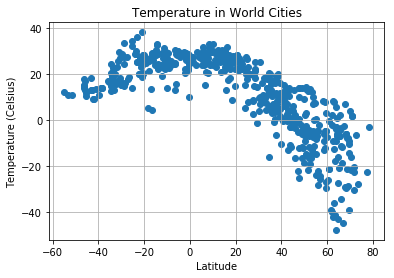

In [117]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

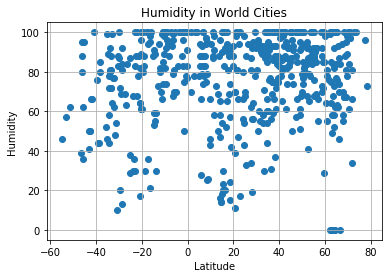

In [118]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

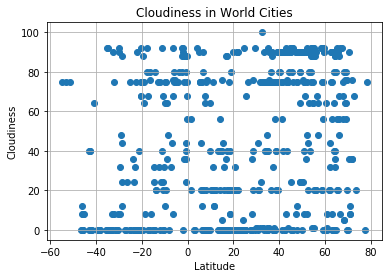

In [119]:
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

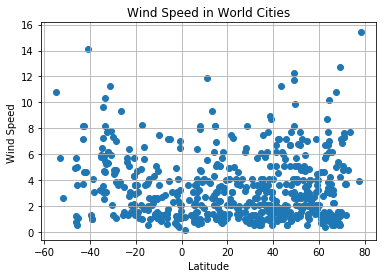

In [120]:
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()